# EDA : Multi Class

# Structure of This Notebook 

### 1. Understanding the Problem Statement
### 2. Data Collection
    - import
    - Information on each variables (general description )
### 3. Data Checks to perform

- Check Missing values
    - Understanding the missingness
- Check Duplicates
- Check data type
- Check the number of unique values of each column

### 4. Univariate Analysis
- The target variable 
- Numerical Features 
    - Statistical Summary: Mean, median, standard deviation, and percentiles.
    - Histograms: To examine the distribution of each numerical feature.
    - Boxplots: To detect outliers and their potential impact on model performance.

- Categorical features
    - exploring categories
    - bar plots
    - statiscs
    - Proportions: Check class balance for each categorical variable.

### 5. Bivariate Analysis
- Numerical vs Target
    - 
- Categorical vs Target
    - cross tab
    - tests : Chi-squared, cramer

### 6. Multivariate Analysis
- Correlation Between Numerical Features
- Relationship Between Features
- Dimensionality Reduction

#### 7. Outlier Detection and understanding 




### 1) Problem statement
- The goal of this project is to predict patient outcomes by estimating the probabilities of three possible classes for each identifier 

- Strategy : MThe model's performance is evaluated using the log loss (negative log-likelihood) metric, which quantifies the accuracy of predicted probabilities for each class.
 - The model outputs predicted classes as discrete labels (0, 1, or 2). These are then converted into probabilities using a one-hot encoding, where the predicted class gets a probability of 1, and the other classes get a probability of 0.

 
### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/saurabh00007/diabetescsv
- The data consists of 9 column and 2000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Fixing the directory path 
import os
os.chdir("C:/Users/RAZER BLADE/Downloads/AI Path/Multi-Class-Classification")

#### Import the CSV Data as Pandas DataFrame

In [3]:
data = pd.read_csv("Datasets/train.csv")

#### Show Top 5 Records

In [4]:
data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


Data shape

In [5]:
data.shape

(15000, 20)

### 2.2 Dataset information

#### Description des Variables :
- id : Identifiant unique du patient.
- N_Days : Nombre de jours, probablement lié à un suivi médical.
- Drug : Médicament administré ou traitement suivi par le patient.
- Age : Âge du patient.
- Sex : Sexe du patient (homme/femme).
- Ascites : Présence d'ascite (accumulation de liquide dans l'abdomen), souvent binaire (0 = non, 1 = oui).
- Hepatomegaly : Présence d'une hépatomégalie (foie élargi), souvent binaire.
- Spiders : Présence de "spiders" (angiomes stellaires), souvent binaire.
- Edema : Présence d'œdème (enflure causée par une rétention de liquide), souvent binaire ou catégorique.
- Bilirubin : Niveau de bilirubine dans le sang (lié à la fonction hépatique).
- Cholesterol : Niveau de cholestérol.
- Albumin : Niveau d'albumine dans le sang.
- Copper : Taux de cuivre dans le sang ou les urines.
- Alk_Phos : Niveau de phosphatase alcaline, un indicateur hépatique.
- SGOT : Niveau de SGOT (aspartate aminotransférase), un marqueur des dommages hépatiques.
- Tryglicerides : Niveau de triglycérides dans le sang.
- Platelets : Nombre de plaquettes dans le sang.
- Prothrombin : Temps de prothrombine (coagulation), un indicateur de la fonction hépatique.
- Stage : Stade de la maladie (souvent 1-4 pour des maladies hépatiques).
- Status (Target) : Variable cible indiquant l’état du patient :

### 3. Data Checks to perform

- Check Missing values
    - Understanding the missingness
- Check Duplicates
- Check data type
- Check the number of unique values of each column

### 3.1 Check Missing values

In [6]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

Tryglicerides    55.800000
Cholesterol      55.540000
Copper           43.653333
Spiders          42.966667
SGOT             42.966667
Alk_Phos         42.946667
Ascites          42.913333
Drug             42.906667
Hepatomegaly     42.906667
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
id                0.000000
Albumin           0.000000
N_Days            0.000000
Bilirubin         0.000000
Edema             0.000000
Sex               0.000000
Age               0.000000
Status            0.000000
dtype: float64

#### Insights : 
- There are 2 variables with 55% of Nan  values whoch are : Tryglicerides, Cholesterol 
- There are 7 variables with 42/43% of Nan values which are : Copper, Spiders, SGOT, alk_Phos, ascites, Drug, Hepatomegaly.
- 2 variables with less than 4% of Nan values : Platelets, Prothrombin.

<Axes: >

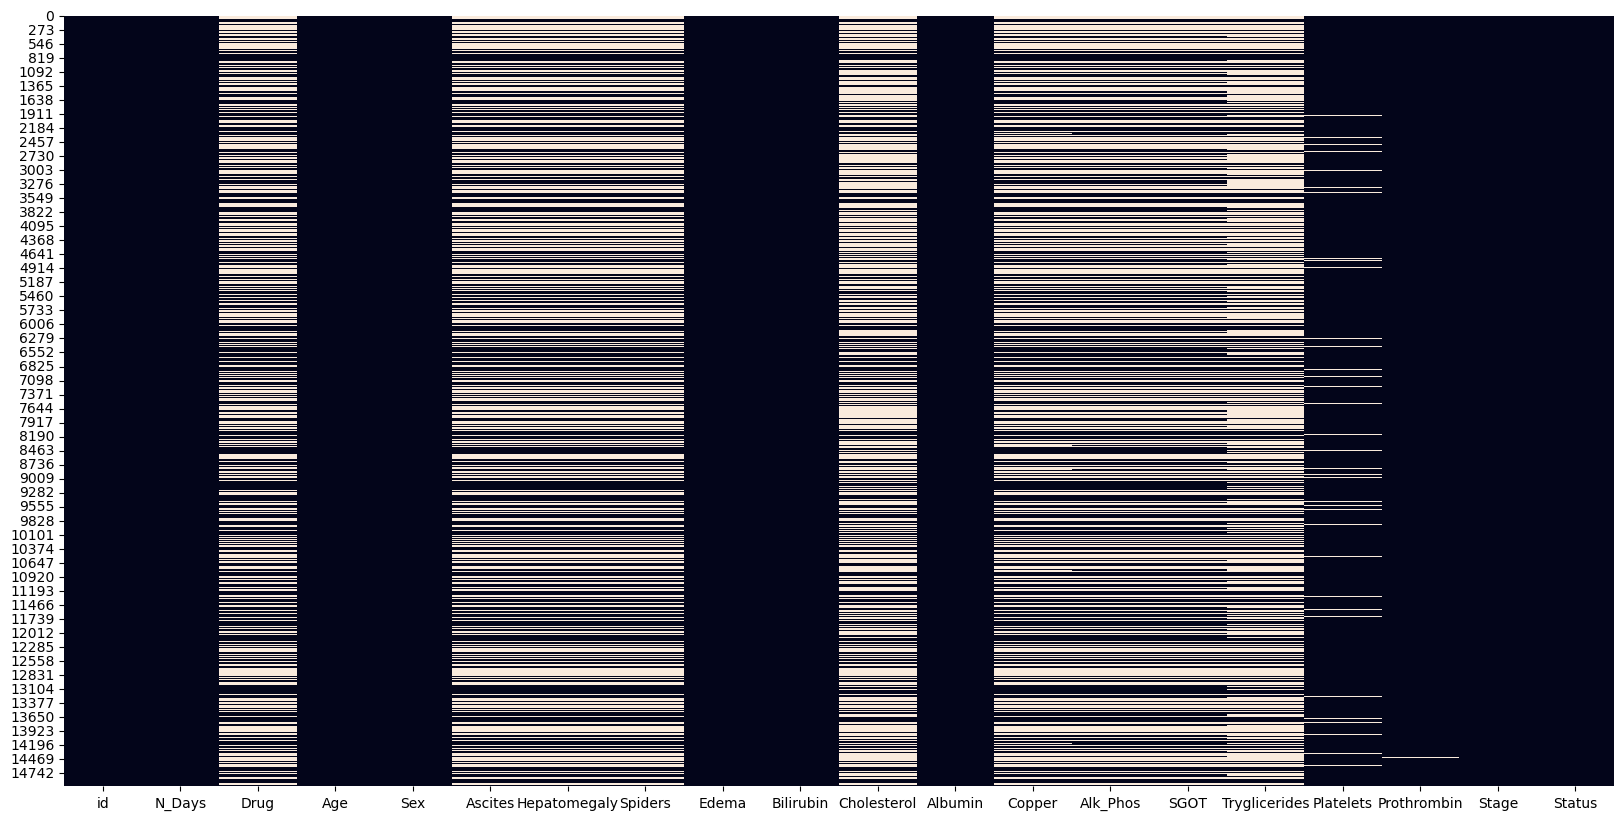

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

### 3.2 Check Duplicates


In [8]:
print(data.duplicated().sum())

0


No duplicated Data in out Dataset

### 3.3 Check data types

In [9]:
data.info()
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

float64    12
object      7
int64       1
Name: count, dtype: int64

#### We have numerical Data, 12 float and 1 integer type. and Categorical Data 7 object type

### 3.4 Checking the number of unique values of each column

In [10]:
data.nunique()

id               15000
N_Days             543
Drug                 2
Age                375
Sex                  2
Ascites              4
Hepatomegaly         3
Spiders              2
Edema                3
Bilirubin          118
Cholesterol        210
Albumin            165
Copper             170
Alk_Phos           387
SGOT               201
Tryglicerides      153
Platelets          267
Prothrombin         54
Stage                4
Status               3
dtype: int64

We dont have a lot of different values for, maybe we can use the Binning technique (grouping variables in ranges)

### 4. Univariate Analysis

### 4.1 Target 

In [11]:
### 3.6 Check Target
target = data[['Status']]
target.value_counts(normalize=True) 

Status
C         0.669933
D         0.304000
CL        0.026067
Name: proportion, dtype: float64

#### Insights : 
we have 3 classes  
- 67 are of class C. 
- 30,4% for class D.
- 2,6% of class CL 

Highly unbalenced classes!

In [19]:
CL = data[data['Status']=='CL']
C = data[data['Status']=='C']
D = data[data['Status']=='D']

#### 4.2 Numerical features 

In [13]:
data['Age'] = data['Age'] / 365
data['N_years'] = data['N_Days'] / 365

In [14]:
data['Stage'] = data['Stage'].astype(object)

#### 4.2.1 Descriptive Statistics 

In [15]:
summary = (data.loc[:, 'N_Days':]).describe()

# Adding the mode to the statistics is always a good practice
modes = data.mode()

# This is just a code that add the mode to the summary dataframe
row_mode = {} # Setting up the dictionnary of the new modes raw 
for key, val in zip(data.columns.to_list(), modes.iloc[0].to_list()):
    row_mode[key] = val
summary.loc['mode'] = row_mode
summary


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,N_years
count,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,1966.998733,52.735623,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,5.389038
std,1355.897299,10.130265,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,3.714787
min,3.000000,0.365205,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,0.008219
25%,1092.000000,44.860274,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.991781
50%,1785.000000,53.545205,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,4.890411
75%,2635.000000,61.284932,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,7.219178
max,40795.000000,97.183562,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,111.767123
mode,2149.000000,64.043836,0.600000,263.000000,3.400000,20.000000,663.000000,57.350000,85.000000,269.000000,10.600000,5.887671


#### Insighs
- 1. Age: minimum = 133 amd max to 35k  ---> Age est en jours il faut convertir en année
- 2. N_Days : maximum is 40797 day which is 111,7 year (not relevant) ---> error in Data.
- 3. the variable Stage is more likely to be categorical than numerical 
- 4. A global view tells that there are a lot of Outliers insignificant !

#### 4.2.3 Histogram & KDE of the features

In [ ]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.histplot(data[col], kde=True)

#### Insights : 
- Right skew distribited variables are : N_days, bilirubin, cholesterol, copper, alk_phos, SGOT, Tryglicerides
    - N_days after 5k seems to be outliers.
    - Age between 10 and 30k.
    - bilirubin 15 to 20 max.
    - cholesterol 1100.
    - copper after 300
    - alk bet 7,5 to 10k
    - sgot after 500 pr less (300)
    - Tryg after 300 to 400
    - proth 9 to 14.


#### 4.2.2 Boxplots & Outliers: To detect outliers and their potential impact on model performance.

In [ ]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.boxplot(x=data[col])

#### Insights : 
Due to the right skewness of the majority of variables we have a lot of positive (bigger values) outlirs.

### Detecting outliers 

#### 4.2 Categorical features

#### 4.2.1 exploring categories
 

In [16]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

Drug---------------------------------------------- [nan 'Placebo' 'D-penicillamine']
Sex----------------------------------------------- ['F' 'M']
Ascites------------------------------------------- [nan 'N' 'Y' 'S' 'D-penicillamine']
Hepatomegaly-------------------------------------- [nan 'Y' 'N' '119.35']
Spiders------------------------------------------- [nan 'Y' 'N']
Edema--------------------------------------------- ['N' 'Y' 'S']
Stage--------------------------------------------- [3.0 4.0 2.0 1.0]
Status-------------------------------------------- ['C' 'D' 'CL']


#### 4.2.2 bar plots 

In [44]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())
    print('-------------')

Drug
D-penicillamine    4568
Placebo            3996
Name: count, dtype: int64
-------------
Sex
F    14403
M      597
Name: count, dtype: int64
-------------
Ascites
N                  8178
Y                   383
S                     1
D-penicillamine       1
Name: count, dtype: int64
-------------
Hepatomegaly
N         4564
Y         3999
119.35       1
Name: count, dtype: int64
-------------
Spiders
N    6773
Y    1782
Name: count, dtype: int64
-------------
Edema
N    13823
S      811
Y      366
Name: count, dtype: int64
-------------
Stage
3.0    5644
4.0    5239
2.0    3380
1.0     737
Name: count, dtype: int64
-------------
Status
C     10049
D      4560
CL      391
Name: count, dtype: int64
-------------


#### Insights : 
- Hepatomegaly has a numerical variables (error in Data)
- Ascites has two strange categories : S(1) and D-pencillamine(1) --> error in data
- We only have few of males (Sex variable) almost all are females ---> check if sex is relevant 




In [17]:
data.loc[data['Hepatomegaly'] == '119.35', 'Hepatomegaly'] = data['Hepatomegaly'].mode()[0]
data.loc[data['Ascites'] == 'S', 'Ascites'] = data['Ascites'].mode()[0]
data.loc[data['Ascites'] == 'D-penicillamine', 'Ascites'] = data['Ascites'].mode()[0]

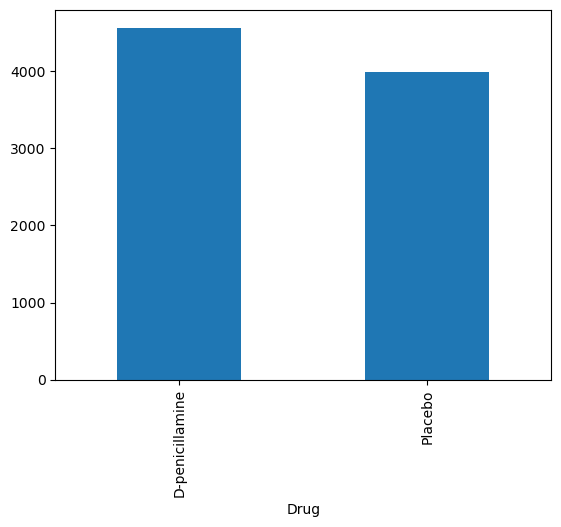

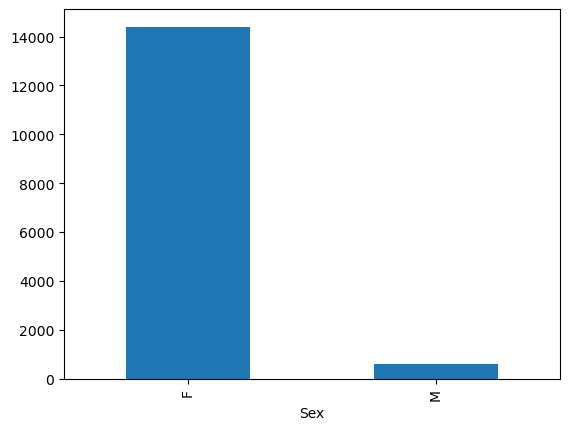

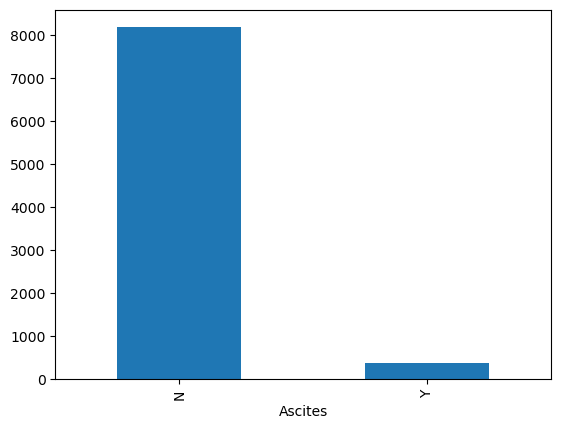

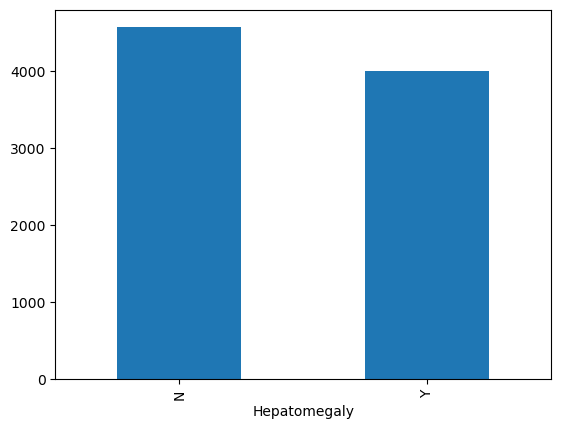

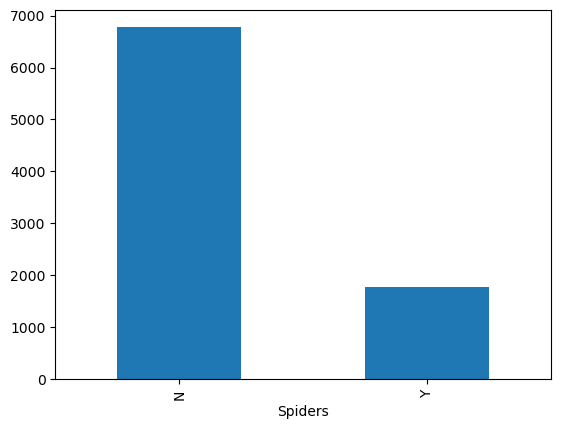

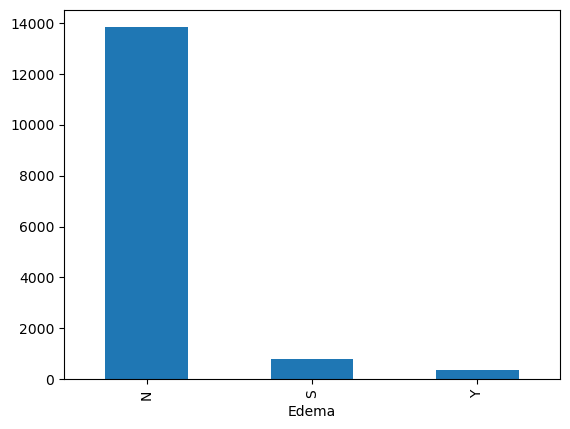

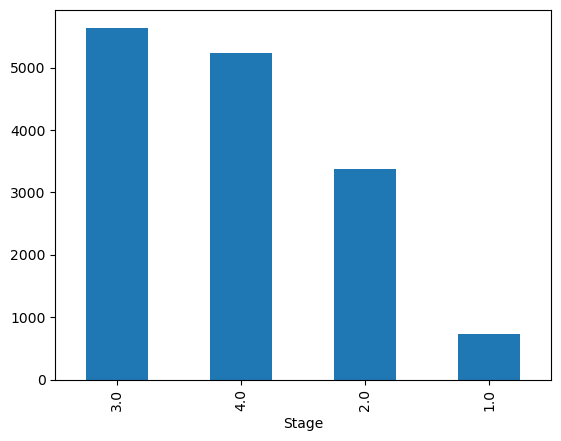

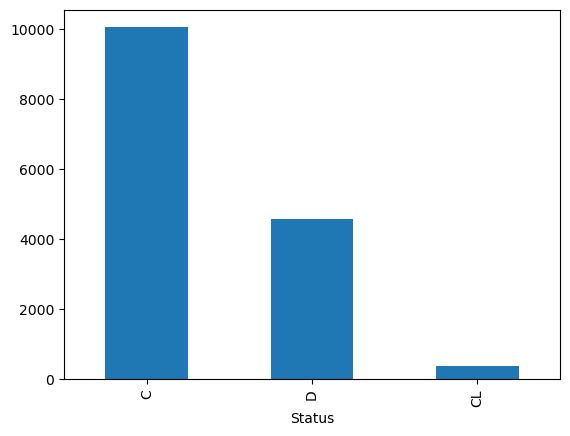

In [18]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.bar()

#### 4.2.3 statiscs

In [19]:
summary = data.describe(include=object)

# Adding the mode to the statistics is always a good practice
modes = data.mode()


# This is just a code that add the mode to the summary dataframe
row_mode = {} # Setting up the dictionnary of the new modes raw 
for key, val in zip(data.columns.to_list(), modes.iloc[0].to_list()):
    row_mode[key] = val
summary.loc['mode'] = row_mode
summary


,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status
count,8564,15000,8563,8564,8555,15000,15000.0,15000
unique,2,2,2,2,2,3,4.0,3
top,D-penicillamine,F,N,N,N,N,3.0,C
freq,4568,14403,8180,4565,6773,13823,5644.0,10049
mode,D-penicillamine,F,N,N,N,N,3.0,C


# 5. Bivariate Analysis


### 5.1 Numerical vs Target

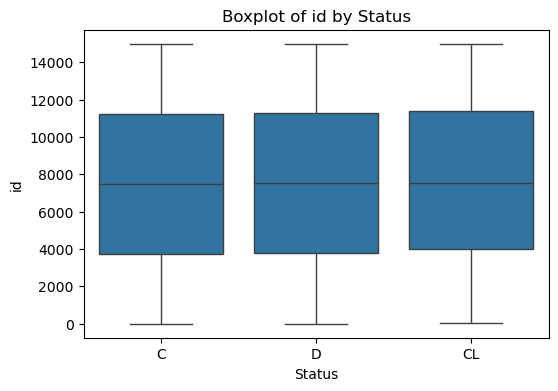

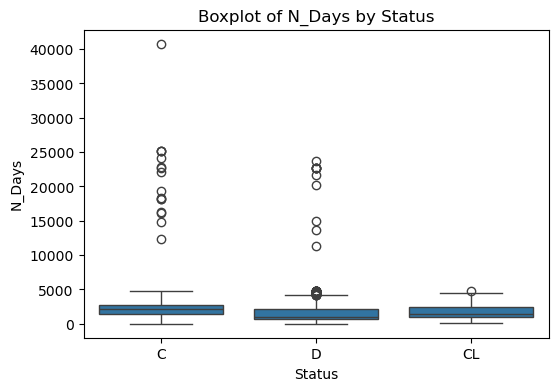

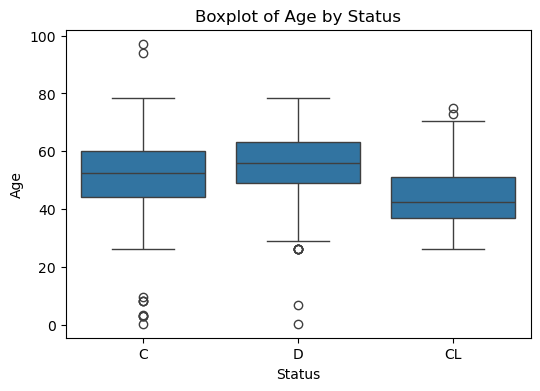

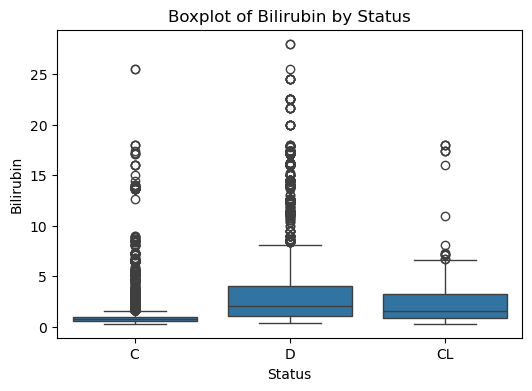

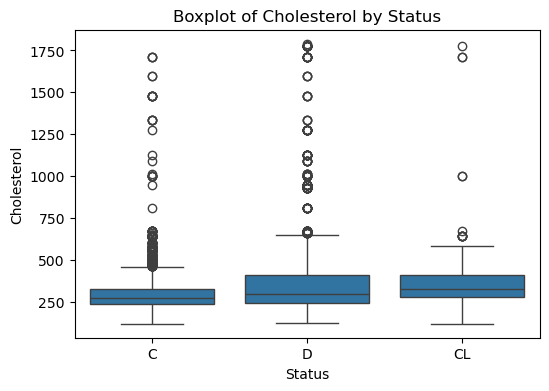

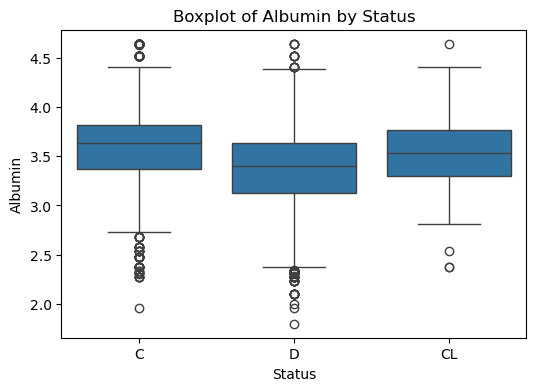

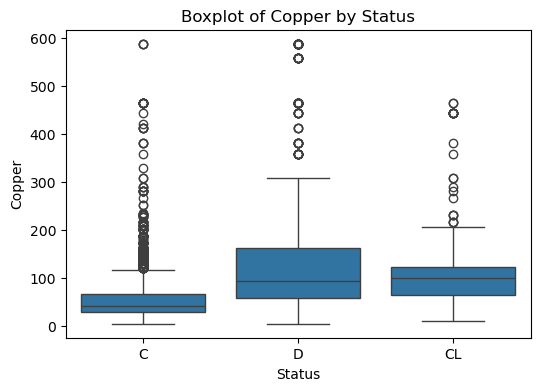

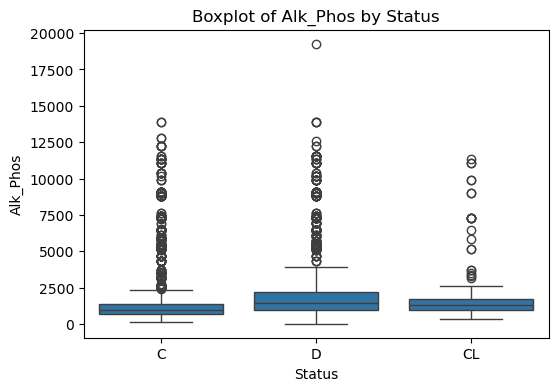

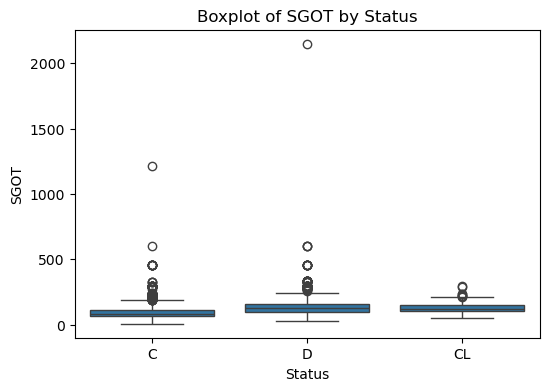

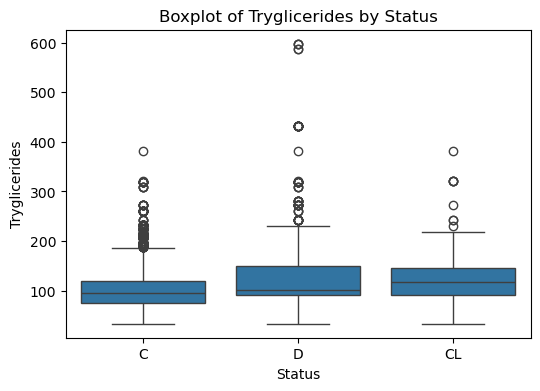

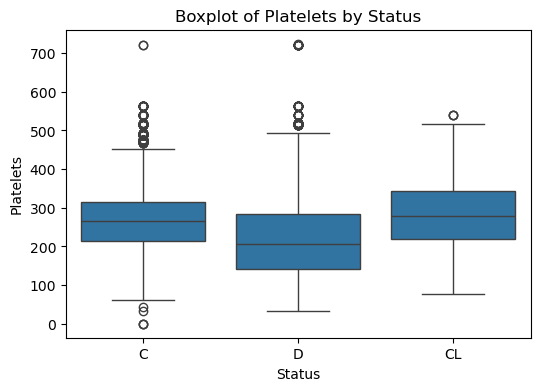

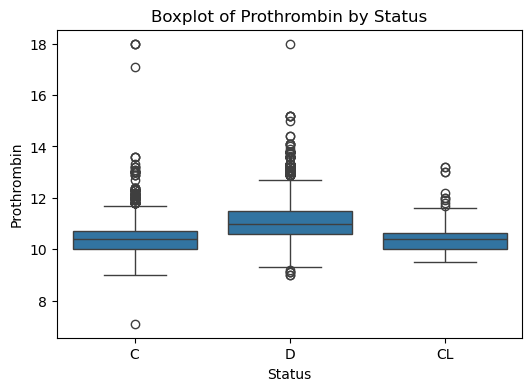

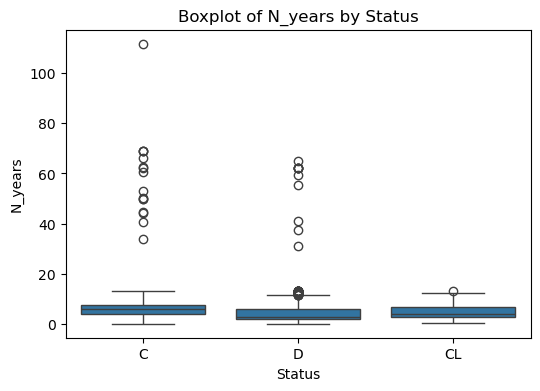

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['Status'], y=data[col])
    plt.title(f"Boxplot of {col} by Status")
    plt.show()


In [69]:
from scipy.stats import kruskal
no_missing = data.dropna(axis=0)


for col in no_missing.select_dtypes(include=['int64', 'float64']).columns:
    groups = [no_missing[col][no_missing['Status'] == cat] for cat in no_missing['Status'].unique()]
    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis test for {col}: p-value = {p}")



Kruskal-Wallis test for id: p-value = 0.6625245080981921
Kruskal-Wallis test for N_Days: p-value = 5.873755849241287e-192
Kruskal-Wallis test for Age: p-value = 8.23176651392788e-60
Kruskal-Wallis test for Bilirubin: p-value = 0.0
Kruskal-Wallis test for Cholesterol: p-value = 6.155168074481915e-38
Kruskal-Wallis test for Albumin: p-value = 5.7909767598252045e-148
Kruskal-Wallis test for Copper: p-value = 0.0
Kruskal-Wallis test for Alk_Phos: p-value = 2.3440461243022035e-118
Kruskal-Wallis test for SGOT: p-value = 2.1862813615231402e-208
Kruskal-Wallis test for Tryglicerides: p-value = 2.6643004243234744e-46
Kruskal-Wallis test for Platelets: p-value = 3.3669484718882665e-70
Kruskal-Wallis test for Prothrombin: p-value = 0.0
Kruskal-Wallis test for N_years: p-value = 5.873755849241287e-192


In [ ]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.boxplot(data, x=col, hue='Status')

In [ ]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.violinplot(data, x=col, hue='Status')

### 5.2 Categorical vs Target

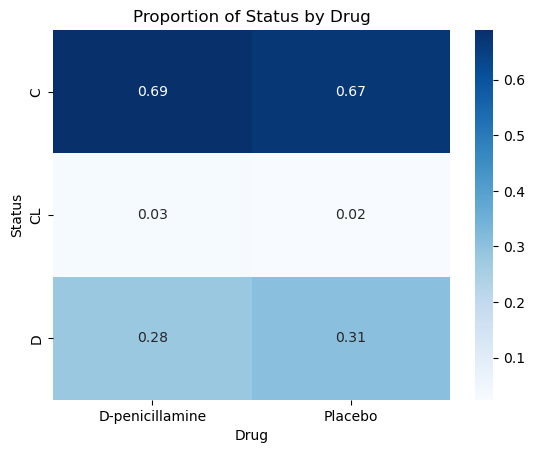

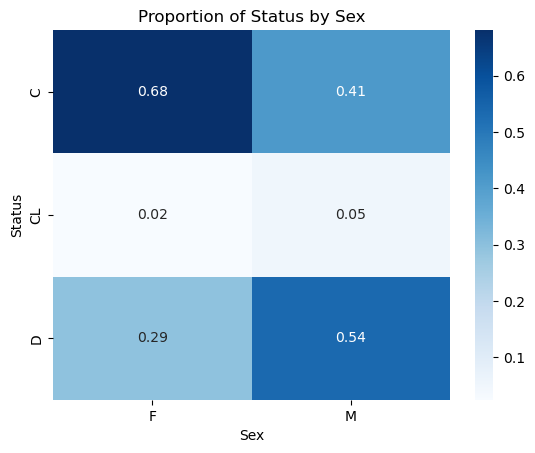

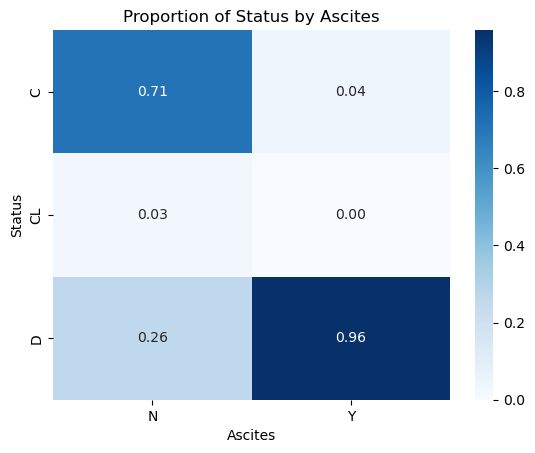

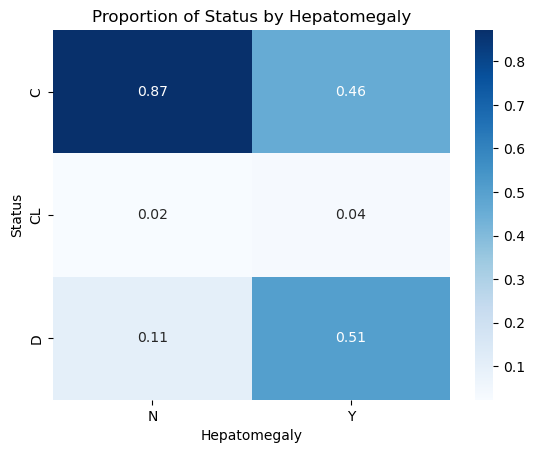

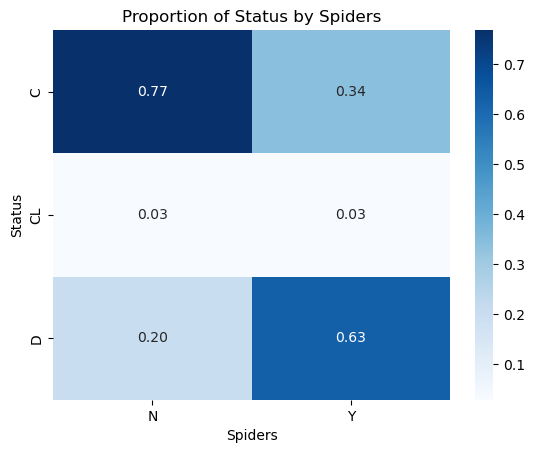

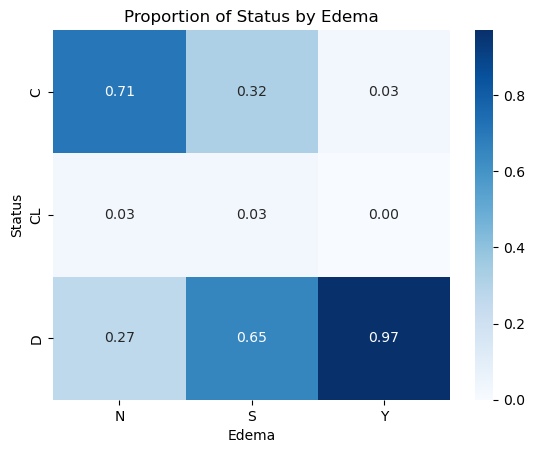

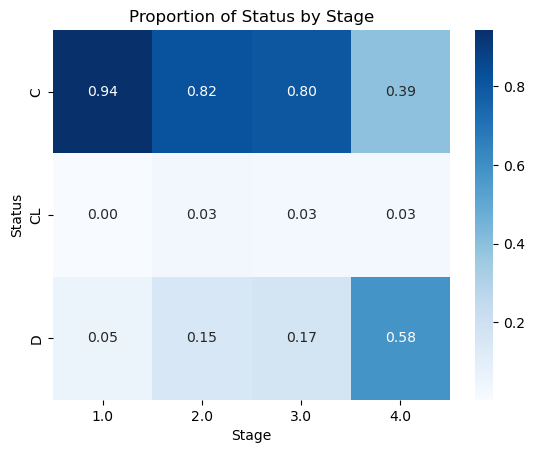

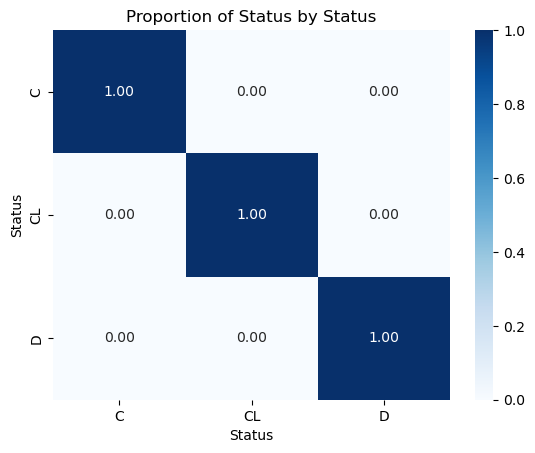

In [21]:
for col in data.select_dtypes('object').columns:
    plt.figure()
    ct = pd.crosstab(data['Status'], data[col], normalize='columns')  # Normalize by columns
    sns.heatmap(ct, annot=True, fmt='.2f', cmap='Blues')  # Adjust format for percentages
    plt.title(f'Proportion of Status by {col}')
    plt.show()


#####  Insights :
- Drug doesn't seem to have effect on the target 
- Females tend not to die compared to males (0.54 of males died)
- Ascites : has direct effect on the target 
    - ascites = Yes --> D / No --> C
- Hepatomegaly : has an effect on target 
    - No --> C / Y nothing 
- Status has an effect too.
- Ededma : 
    - yes --> D 
- Stage has effect too : 
    - when stage is low(1, 2 ,3) --> C 


#### 5.2.1 Categorical vs Target : Applying tests

- Null Hypothesis (H₀): There is no relationship between the variable and Status. They are independent.
- Alternative Hypothesis (H₁): There is a relationship between the two variables. They are dependent.

In [23]:
import pandas as pd
import scipy.stats as stats

for col in data.select_dtypes('object').columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data['Status'], data[col])
    # Perform the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-square Statistic: {chi2}")
    print(f"P-value: {p}")

    # Interpret results
    alpha = 0.05  # Significance level
    if p < alpha:
        print(f"The variable {col} and Status are significantly associated (Dependant) ")
    else:
        print("No significant association (Independant).")
    print('-----------------------')


Chi-square Statistic: 10.398610569958167
P-value: 0.0055203981924629286
The variable Drug and Status are significantly associated (Dependant) 
-----------------------
Chi-square Statistic: 187.76010370560022
P-value: 1.6920434828805052e-41
The variable Sex and Status are significantly associated (Dependant) 
-----------------------
Chi-square Statistic: 861.0296027338684
P-value: 1.071019526100315e-187
The variable Ascites and Status are significantly associated (Dependant) 
-----------------------
Chi-square Statistic: 1719.7395887796806
P-value: 0.0
The variable Hepatomegaly and Status are significantly associated (Dependant) 
-----------------------
Chi-square Statistic: 1261.800547931398
P-value: 1.008073934491919e-274
The variable Spiders and Status are significantly associated (Dependant) 
-----------------------
Chi-square Statistic: 1337.2522922055573
P-value: 2.7873191207540522e-288
The variable Edema and Status are significantly associated (Dependant) 
-----------------------

#### Cramer Test 

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats

for col in data.select_dtypes('object').columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data['Status'], data[col])
    # Perform the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# Perform the Chi-Square test


    # Compute Cramér's V
    n = contingency_table.sum().sum()  # Total number of observations
    k = min(contingency_table.shape)  # Min(rows, columns)
    cramer_v = np.sqrt(chi2 / (n * (k - 1)))

    # Print results
    print('--',col,'---------------')
    print(f"Chi-square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramér’s V: {cramer_v}")

    # Interpretation
    if cramer_v < 0.1:
        print("Weak association")
    elif cramer_v < 0.3:
        print("Moderate association")
    elif cramer_v < 0.5:
        print("Strong association")
    else:
        print("Very strong association")
    #print('----------------')

-- Drug ---------------
Chi-square Statistic: 10.398610569958167
P-value: 0.0055203981924629286
Cramér’s V: 0.03484571078694383
Weak association
-- Sex ---------------
Chi-square Statistic: 187.76010370560022
P-value: 1.6920434828805052e-41
Cramér’s V: 0.11188091994187398
Moderate association
-- Ascites ---------------
Chi-square Statistic: 861.0296027338684
P-value: 1.071019526100315e-187
Cramér’s V: 0.31709987403060624
Strong association
-- Hepatomegaly ---------------
Chi-square Statistic: 1719.7395887796806
P-value: 0.0
Cramér’s V: 0.44811864608509205
Strong association
-- Spiders ---------------
Chi-square Statistic: 1261.800547931398
P-value: 1.008073934491919e-274
Cramér’s V: 0.3840478594900501
Strong association
-- Edema ---------------
Chi-square Statistic: 1337.2522922055573
P-value: 2.7873191207540522e-288
Cramér’s V: 0.211128104256283
Moderate association
-- Stage ---------------
Chi-square Statistic: 2992.391758273404
P-value: 0.0
Cramér’s V: 0.3158265219110751
Strong asso

#### Conclusion
The most strongly associated variables with Status are:

- Hepatomegaly (0.448)
- Spiders (0.384)
- Ascites (0.317)
- Stage (0.316)
- Sex and Edema are moderately associated, while Drug has only a weak association.

- the strongest predictors are Hepatomegaly, Spiders, Ascites, and Stage.

### 6. Multivariate Analysis
- Correlation Between Numerical Features
- Relationship Between Features
- Dimensionality Reduction

#### 6.1 Correlation Between Numerical Features

In [ ]:
sns.heatmap(data.select_dtypes(['float', 'int']).corr(), cbar=True, cmap="plasma")

#### 6.2 Relationship Between Features

#### 6.2 - Dimensionality Reduction 